In [4]:
import matplotlib.image as image
my_image = image.imread('C:/Work/Orange3/Mine/08/k_means_image2/백단심계3.jpg')
print(my_image.shape)
row = my_image.shape[0]
col = my_image.shape[1]
print("row", row)
print("col", col)

(1223, 1837, 3)
row 1223
col 1837


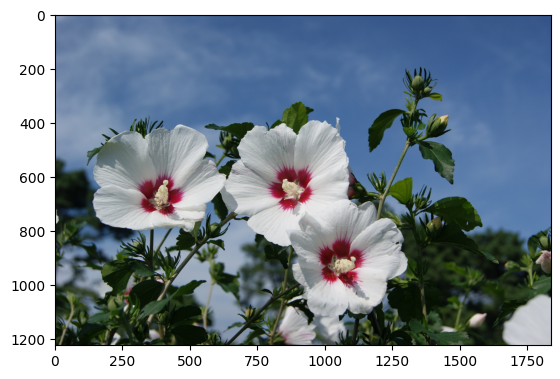

In [7]:
import matplotlib.pyplot as plt

plt.imshow(my_image)
plt.show()

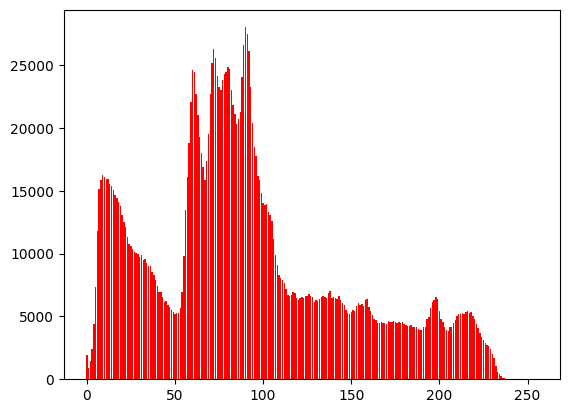

In [8]:
import numpy as np
histogram, bin_edges = np.histogram(my_image[:,:,0], bins=256, range=(0,256))
plt.bar(bin_edges[0:-1], histogram, color="red")
plt.show()

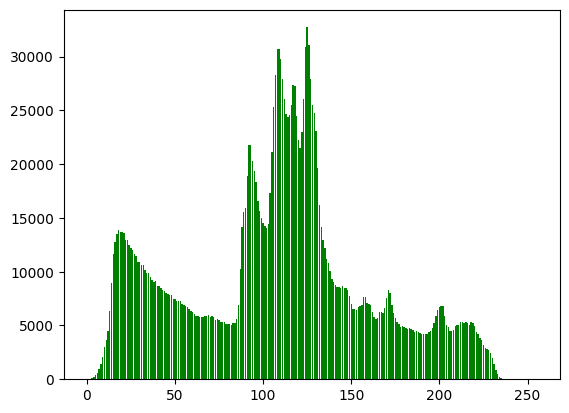

In [9]:
histogram, bin_edges = np.histogram(my_image[:,:,1], bins=256, range=(0,256))
plt.bar(bin_edges[0:-1], histogram, color="green")
plt.show()

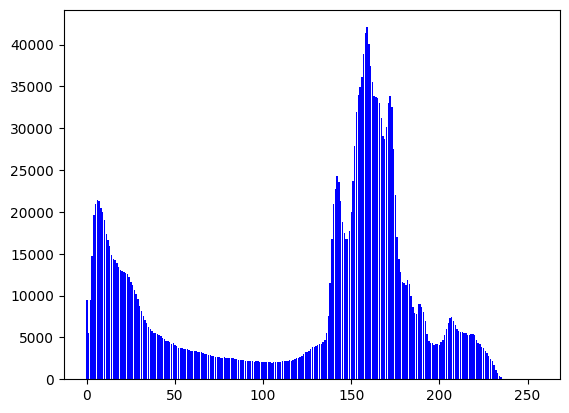

In [11]:
histogram, bin_edges = np.histogram(my_image[:,:,2], bins=256, range=(0,256))
plt.bar(bin_edges[0:-1], histogram, color="blue")
plt.show()

In [12]:
my_image = my_image.reshape(-1, 3)
print(my_image.shape)

(2246651, 3)


In [16]:
from sklearn.cluster import KMeans

new_images = []
inertias = [] #군집이 얼마나 잘 응집되었는지 보여주는 지표
for i in range(2, 11, 2):
   km = KMeans(
       n_clusters=i, init='random',
       n_init=10, max_iter=300,
       tol=1e-04, random_state=0
   )
   km.fit(my_image)
   inertias.append(km.inertia_)
   new_image = km.cluster_centers_[km.labels_]
   new_image = new_image.astype('uint8')
   new_image = new_image.reshape(row, col, -1)
   new_images.append(new_image)

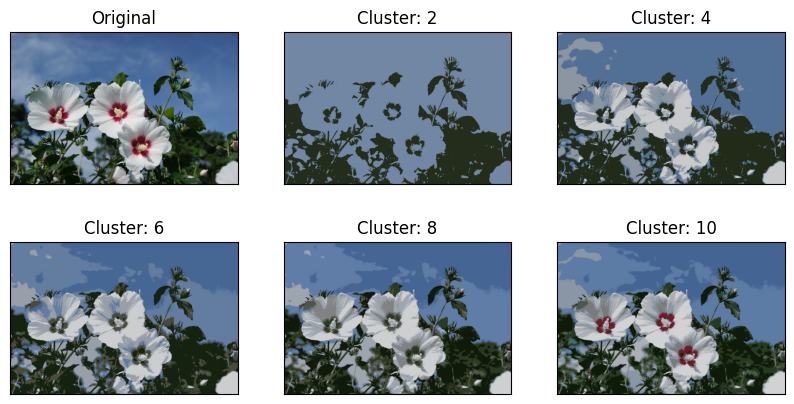

In [21]:
fig = plt.figure(figsize=(10,5))
graph_rows = 2
graph_cols = 3
ax = fig.add_subplot(graph_rows, graph_cols, 1)
ax.set_title("Original")
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(my_image.reshape(row, col, -1))

j=2
for i, image in enumerate(new_images):
    ax = fig.add_subplot(graph_rows, graph_cols, i+2)
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Cluster: " + str(i+j))
    j += 1
    
plt.show()


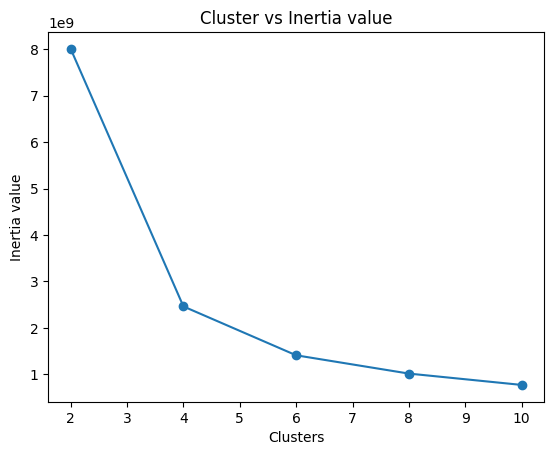

In [22]:
plt.plot(range(2, 11, 2), inertias, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia value')
plt.title('Cluster vs Inertia value')
plt.show()